<a href="https://colab.research.google.com/github/chengleniubi/L_tensor/blob/main/04.%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%EF%BC%88%E8%BF%9B%E9%98%B6%EF%BC%89/1.linear-regression-gradient-descend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 线性模型和梯度下降
这是神经网络的第一课，我们会学习一个非常简单的模型，线性回归，同时也会学习一个优化算法-梯度下降法，对这个模型进行优化。线性回归是监督学习里面一个非常简单的模型，同时梯度下降也是深度学习中应用最广的优化算法，我们将从这里开始我们的深度学习之旅

In [11]:
import torch
import numpy as np
from torch.autograd import Variable

#torch.manual_seed(2017)
torch.cuda.manual_seed(2017)

In [12]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

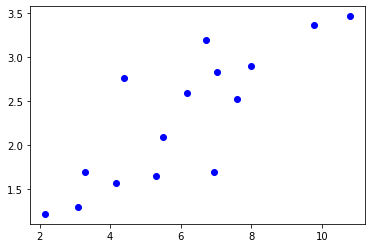

In [13]:
# 画出图像
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

In [14]:
# 转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化

In [15]:
# 构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [16]:
y_ = linear_model(x_train)

经过上面的步骤我们就定义好了模型，在进行参数更新之前，我们可以先看看模型的输出结果长什么样

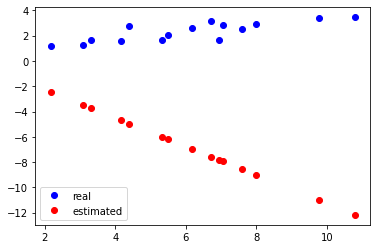

In [17]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

**思考：红色的点表示预测值，似乎排列成一条直线，请思考一下这些点是否在一条直线上？**

这个时候需要计算我们的误差函数，也就是

$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$

In [18]:
# 计算误差
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

loss = get_loss(y_, y_train)

In [19]:
# 打印一下看看 loss 的大小
print(loss)

tensor(94.9309, grad_fn=<MeanBackward0>)


定义好了误差函数，接下来我们需要计算 w 和 b 的梯度了，这时得益于 PyTorch 的自动求导，我们不需要手动去算梯度，有兴趣的同学可以手动计算一下，w 和 b 的梯度分别是

$$
\frac{\partial}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i(w x_i + b - y_i) \\
\frac{\partial}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
$$

In [20]:
# 自动求导
loss.backward()

In [23]:
# 查看 w 和 b 的梯度
print(w.grad)
print(w.grad.data)
print(b.grad)

tensor([-126.6150])
tensor([-126.6150])
tensor([-18.3376])


In [24]:
# 更新一次参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

更新完成参数之后，我们再一次看看模型输出的结果

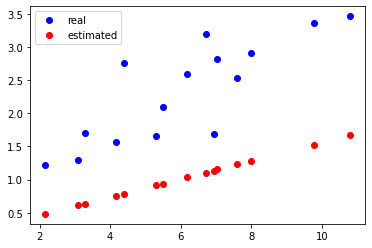

In [25]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

从上面的例子可以看到，更新之后红色的线跑到了蓝色的线下面，没有特别好的拟合蓝色的真实值，所以我们需要在进行几次更新

In [27]:
for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.item()))

epoch: 0, loss: 0.2387673556804657
epoch: 1, loss: 0.20673297345638275
epoch: 2, loss: 0.20595277845859528
epoch: 3, loss: 0.20575189590454102
epoch: 4, loss: 0.2055628001689911
epoch: 5, loss: 0.20537473261356354
epoch: 6, loss: 0.20518773794174194
epoch: 7, loss: 0.20500163733959198
epoch: 8, loss: 0.20481650531291962
epoch: 9, loss: 0.20463234186172485


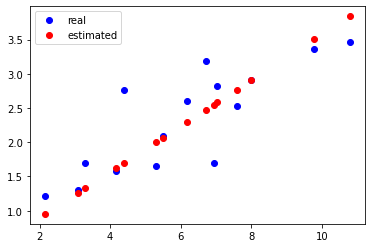

In [28]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

经过 10 次更新，我们发现红色的预测结果已经比较好的拟合了蓝色的真实值。

现在你已经学会了你的第一个机器学习模型了，再接再厉，完成下面的小练习。

**小练习：**

重启 notebook 运行上面的线性回归模型，但是改变训练次数以及不同的学习率进行尝试得到不同的结果

## 多项式回归模型

下面我们更进一步，讲一讲多项式回归。

首先我们可以先定义一个需要拟合的目标函数，这个函数是个三次的多项式

In [32]:
# 定义一个多变量函数

w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)
print(w_target)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3
[0.5 3.  2.4]


我们可以先画出这个多项式的图像

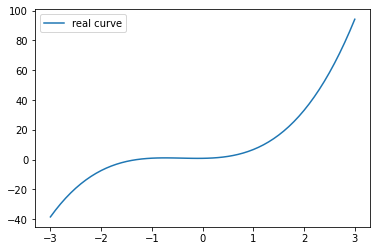

In [34]:
# 画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3
plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

接着我们可以构建数据集，需要 x 和 y，同时是一个三次多项式，所以我们取了 $x,\ x^2, x^3$

In [ ]:
# 构建数据 x 和 y
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]

x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
print(x_train)
x_train = torch.from_numpy(x_train).float() # 转换成 float tensor
print(x_train)
y_train = torch.from_numpy(y_sample).float().unsqueeze(1) # 转化成 float tensor 
print(x_train)

接着我们可以定义需要优化的参数，就是前面这个函数里面的 $w_i$

In [37]:
# 定义参数和模型
w = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)
print(w)
# 将 x 和 y 转换成 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b

我们可以画出没有更新之前的模型和真实的模型之间的对比

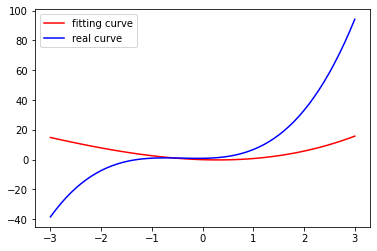

In [38]:
# 画出更新之前的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

可以发现，这两条曲线之间存在差异，我们计算一下他们之间的误差

In [39]:
# 计算误差，这里的误差和一元的线性模型的误差是相同的，前面已经定义过了 get_loss
loss = get_loss(y_pred, y_train)
print(loss)

tensor(756.3784, grad_fn=<MeanBackward0>)


In [40]:
# 自动求导
loss.backward()

In [41]:
# 查看一下 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([[ -88.0635],
        [ -50.3721],
        [-574.2020]])
tensor([-9.8301])


In [42]:
# 更新一下参数
w.data = w.data - 0.001 * w.grad.data
b.data = b.data - 0.001 * b.grad.data

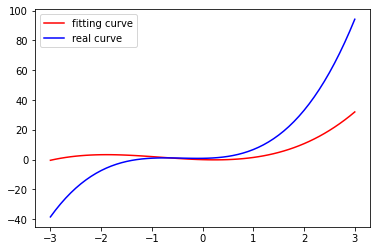

In [43]:
# 画出更新一次之后的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

因为只更新了一次，所以两条曲线之间的差异仍然存在，我们进行 100 次迭代

In [49]:
# 进行 100 次参数更新
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    # 更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {}'.format(e+1 , loss.item()))

epoch 20, Loss: 0.6435574293136597
epoch 40, Loss: 0.6196027398109436
epoch 60, Loss: 0.5965829491615295
epoch 80, Loss: 0.5744292736053467
epoch 100, Loss: 0.5531014800071716


可以看到更新完成之后 loss 已经非常小了，我们画出更新之后的曲线对比

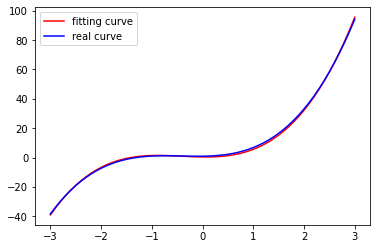

In [50]:
# 画出更新之后的结果
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

可以看到，经过 100 次更新之后，可以看到拟合的线和真实的线已经完全重合了

**小练习：上面的例子是一个三次的多项式，尝试使用二次的多项式去拟合它，看看最后能做到多好**

**提示：参数 `w = torch.randn(2, 1)`，同时重新构建 x 数据集**